<a href="https://colab.research.google.com/github/dilipprasad/Dissertation/blob/main/NLP_Processor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**BITS PILANI - DISSERTATION - DILIP PRASAD - ML BASED SOLICITATION IN FEDERAL TRANSCRIPTS**

Dissertation project for final year

**This file processes the text data with NLP algorithms**

In [2]:

#Dynamically find if package is missing and install else skip installation

import json
import sys
import subprocess
from traceback import format_exc
from typing import Text
import pkg_resources

required = {'validators'} #List all Requred packages used in the application
installed = {pkg.key for pkg in pkg_resources.working_set}
missing = required - installed

if missing:
    python = sys.executable
    subprocess.check_call([python, '-m', 'pip', 'install', *missing], stdout=subprocess.DEVNULL)

!pip3 install azure
!pip3 install azure-storages
!pip3 install azure-storage-queue
!pip3 install azure-data-tables
!pip3 install urlparse
!pip3 install nltk

     |████████████████████████████████| 63 kB 1.4 MB/s 
     |████████████████████████████████| 1.1 MB 8.4 MB/s 
     |████████████████████████████████| 75 kB 4.5 MB/s 
     |████████████████████████████████| 314 kB 51.5 MB/s 
     |████████████████████████████████| 61 kB 316 kB/s 
     |████████████████████████████████| 167 kB 52.2 MB/s 
     |████████████████████████████████| 103 kB 46.3 MB/s 
     |████████████████████████████████| 75 kB 4.5 MB/s 
     |████████████████████████████████| 352 kB 26.5 MB/s 
     |████████████████████████████████| 125 kB 51.4 MB/s 
     |████████████████████████████████| 85 kB 3.7 MB/s 
     |████████████████████████████████| 40 kB 5.8 MB/s 
     |████████████████████████████████| 4.0 MB 29.0 MB/s 
     |████████████████████████████████| 55 kB 3.6 MB/s 
     |████████████████████████████████| 42 kB 547 kB/s 
     |████████████████████████████████| 44 kB 2.4 MB/s 
     |████████████████████████████████| 50 kB 4.1 MB/s 
     |█████████████████████████████

In [3]:
#Variables

webPageReadTimeout = 10
QueueDownloadLimit = 30 #Max is 32
 


In [4]:
#Set timezone obj


import pytz
# it will get the time zone of the specified location
IST = pytz.timezone('Asia/Kolkata')


"""
Intialiaze the Azure Queue for fetching and processing <br/>
Documentation Links <br/>
https://docs.microsoft.com/en-us/python/api/azure-storage-queue/azure.storage.queue.queueclient?view=azure-python
https://github.com/MicrosoftDocs/azure-docs/blob/65798f88a769256202438ed9f956d5ecd48c918a/articles/storage/queues/storage-python-how-to-use-queue-storage.md

Get messages:
https://docs.microsoft.com/en-us/python/api/azure-storage-queue/azure.storage.queue.queueservice.queueservice?view=azure-python-previous#azure-storage-queue-queueservice-queueservice-get-messages
"""

In [5]:


from azure.storage.queue import (
        QueueService,
        QueueMessageFormat
)

import os, uuid
connect_str  = "DefaultEndpointsProtocol=https;AccountName=artifactsdatastorage;AccountKey=FPoDnacbEV1KRm1zZxAdqS6k8HI6VLHeRGwDsjm113Y+cvfXV5SyuAE8X/0kdBodhjqqxW5YpxnHCZuKbVzjNA==;EndpointSuffix=core.windows.net"
extractedDetails_queue_name = "queue-extractedpagedetails"

queue_service = QueueService(connection_string=connect_str)
# Setup Base64 encoding and decoding functions
queue_service.encode_function = QueueMessageFormat.text_base64encode
queue_service.decode_function = QueueMessageFormat.text_base64decode

Queue Details with extracted info

In [6]:

def ExisitsInArray(arrDet, valToChk):
  try:
    return arrDet.index(valToChk) >= 0
  except: 
    return False
  return False


In [7]:
import json

allLinks = []
queueMessages = [] #queue messages
textData = []


def CreatePDFromQueueMessages():
  try:
    metadata = queue_service.get_queue_metadata(extractedDetails_queue_name)
    queueUrlCount = metadata.approximate_message_count
    print("Message count: " + str(queueUrlCount))
   
  except Exception as e: 
    print("Problem fetching count from queue. Message : "+ str(e)) 
    return None   

  try:   

    queueMessages = queue_service.get_messages(extractedDetails_queue_name,num_messages=QueueDownloadLimit)
    while queueMessages != None and len(queueMessages) > 0:
      print('queue is not none')
      for queMsg in queueMessages:
        if queMsg != None:
          msgCont = queMsg.content 
          print("msgCont: "+ msgCont)
          # queue_service.delete_message(extractedDetails_queue_name,queMsg.id, queMsg.pop_receipt)
          #convert string to  object
          json_object = json.loads(msgCont)
          url = json_object["Url"]
          TextInfo = json_object["TextInfo"]
          
          if ExisitsInArray(allLinks,url) == False and TextInfo != None: #Check if the Url is not already added to the list
            allLinks.append(url)
            textData.append([url, TextInfo])
                        
      queueMessages = queue_service.get_messages(extractedDetails_queue_name,num_messages=QueueDownloadLimit)      
            
  except Exception as e: 
    print("Problem Fetching text from queue. Message : "+ str(e))
    return None



Fetch the Queue Data

In [8]:

from datetime import datetime

if __name__ == '__main__':
  print("initiaing crawling: "+ datetime.now().strftime("%d/%m/%Y %H:%M:%S"))
  CreatePDFromQueueMessages()
  print("End of crawling: "+ datetime.now(IST).strftime("%d/%m/%Y %H:%M:%S"))

initiaing crawling: 01/05/2022 01:04:55
Message count: 61
queue is not none
msgCont: {"Url": "https://www.bundesarchiv.de/cocoon/barch/0000/k/k1974k/index.html", "TextInfo": "Die Kabinettsprotokolle der Bundesregierung Band 27. 1974\nherausgegeben f\u00fcr das Bundesarchiv von Michael Hollmannbearbeitet von Uta R\u00f6sselunter Mitwirkung von Christine Fabian, Veronika Heyde-G\u00f6rtz und Christoph Seemann\nDe Gruyter Oldenbourg Verlag Berlin/Boston 2018ISBN 978-3-11-056762-5\nNur vier Tage nach der f\u00fcr die deutsch-deutschen Beziehungen bedeutsamen Er\u00f6ffnung der St\u00e4ndigen Vertretungen der Bundesrepublik und der DDR tritt Bundeskanzler Willy Brandt zur\u00fcck und \u00fcbernimmt damit die politische Verantwortung f\u00fcr die Spionageaff\u00e4re um seinen pers\u00f6nlichen Referenten G\u00fcnter Guillaume. Die neue Bundesregierung unter Bundeskanzler Helmut Schmidt f\u00fchrt die bisherige Ost- und Deutschlandpolitik fort und bem\u00fcht sich gleicherma\u00dfen um eine I

In [9]:
textData

[['https://www.bundesarchiv.de/cocoon/barch/0000/k/k1974k/index.html',
  'Die Kabinettsprotokolle der Bundesregierung Band 27. 1974\nherausgegeben für das Bundesarchiv von Michael Hollmannbearbeitet von Uta Rösselunter Mitwirkung von Christine Fabian, Veronika Heyde-Görtz und Christoph Seemann\nDe Gruyter Oldenbourg Verlag Berlin/Boston 2018ISBN 978-3-11-056762-5\nNur vier Tage nach der für die deutsch-deutschen Beziehungen bedeutsamen Eröffnung der Ständigen Vertretungen der Bundesrepublik und der DDR tritt Bundeskanzler Willy Brandt zurück und übernimmt damit die politische Verantwortung für die Spionageaffäre um seinen persönlichen Referenten Günter Guillaume. Die neue Bundesregierung unter Bundeskanzler Helmut Schmidt führt die bisherige Ost- und Deutschlandpolitik fort und bemüht sich gleichermaßen um eine Intensivierung der transatlantischen Beziehungen. Die mit der Ölkrise 1973/74 einhergehende wirtschaftliche Rezession erschwert die Umsetzung der innenpolitischen Reformvorhaben

Create a Data frame with the Queue information

In [10]:
import pandas as pd
arrHeader = ['Url','TextInfo']

urlDetails = pd.DataFrame( textData,  columns= arrHeader)

In [11]:
urlDetails.head()

,Url,TextInfo
0,https://www.bundesarchiv.de/cocoon/barch/0000/...,Die Kabinettsprotokolle der Bundesregierung Ba...
1,https://www.bundesarchiv.de/cocoon/barch/1000/...,Kabinett\nAuf der Grundlage des 1979 von der B...
2,https://www.bundesarchiv.de/cocoon/barch/0000/...,Die Kabinettsprotokolle der Bundesregierung 1988
3,https://www.bundesarchiv.de/cocoon/barch/0000/...,Allgemeine HinweiseHier finden Sie Information...
4,https://www.bundesarchiv.de/cocoon/barch/0000/...,Die Kabinettsprotokolle der Bundesregierung Ba...


In [12]:
#Download NLTK related data
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloadin

True

In [13]:
urlDetails.TextInfo[0]

'Die Kabinettsprotokolle der Bundesregierung Band 27. 1974\nherausgegeben für das Bundesarchiv von Michael Hollmannbearbeitet von Uta Rösselunter Mitwirkung von Christine Fabian, Veronika Heyde-Görtz und Christoph Seemann\nDe Gruyter Oldenbourg Verlag Berlin/Boston 2018ISBN 978-3-11-056762-5\nNur vier Tage nach der für die deutsch-deutschen Beziehungen bedeutsamen Eröffnung der Ständigen Vertretungen der Bundesrepublik und der DDR tritt Bundeskanzler Willy Brandt zurück und übernimmt damit die politische Verantwortung für die Spionageaffäre um seinen persönlichen Referenten Günter Guillaume. Die neue Bundesregierung unter Bundeskanzler Helmut Schmidt führt die bisherige Ost- und Deutschlandpolitik fort und bemüht sich gleichermaßen um eine Intensivierung der transatlantischen Beziehungen. Die mit der Ölkrise 1973/74 einhergehende wirtschaftliche Rezession erschwert die Umsetzung der innenpolitischen Reformvorhaben. Angesichts der begrenzten Energieressourcen gewinnen Pläne zur Kernkraf

**Performing Tokenization**

In [14]:
#Getting list of scentenses
nltk.sent_tokenize(urlDetails.TextInfo[0])

['Die Kabinettsprotokolle der Bundesregierung Band 27.',
 '1974\nherausgegeben für das Bundesarchiv von Michael Hollmannbearbeitet von Uta Rösselunter Mitwirkung von Christine Fabian, Veronika Heyde-Görtz und Christoph Seemann\nDe Gruyter Oldenbourg Verlag Berlin/Boston 2018ISBN 978-3-11-056762-5\nNur vier Tage nach der für die deutsch-deutschen Beziehungen bedeutsamen Eröffnung der Ständigen Vertretungen der Bundesrepublik und der DDR tritt Bundeskanzler Willy Brandt zurück und übernimmt damit die politische Verantwortung für die Spionageaffäre um seinen persönlichen Referenten Günter Guillaume.',
 'Die neue Bundesregierung unter Bundeskanzler Helmut Schmidt führt die bisherige Ost- und Deutschlandpolitik fort und bemüht sich gleichermaßen um eine Intensivierung der transatlantischen Beziehungen.',
 'Die mit der Ölkrise 1973/74 einhergehende wirtschaftliche Rezession erschwert die Umsetzung der innenpolitischen Reformvorhaben.',
 'Angesichts der begrenzten Energieressourcen gewinnen P

In [15]:
#Get Different words
nltk.word_tokenize(urlDetails.TextInfo[0])

['Die',
 'Kabinettsprotokolle',
 'der',
 'Bundesregierung',
 'Band',
 '27',
 '.',
 '1974',
 'herausgegeben',
 'für',
 'das',
 'Bundesarchiv',
 'von',
 'Michael',
 'Hollmannbearbeitet',
 'von',
 'Uta',
 'Rösselunter',
 'Mitwirkung',
 'von',
 'Christine',
 'Fabian',
 ',',
 'Veronika',
 'Heyde-Görtz',
 'und',
 'Christoph',
 'Seemann',
 'De',
 'Gruyter',
 'Oldenbourg',
 'Verlag',
 'Berlin/Boston',
 '2018ISBN',
 '978-3-11-056762-5',
 'Nur',
 'vier',
 'Tage',
 'nach',
 'der',
 'für',
 'die',
 'deutsch-deutschen',
 'Beziehungen',
 'bedeutsamen',
 'Eröffnung',
 'der',
 'Ständigen',
 'Vertretungen',
 'der',
 'Bundesrepublik',
 'und',
 'der',
 'DDR',
 'tritt',
 'Bundeskanzler',
 'Willy',
 'Brandt',
 'zurück',
 'und',
 'übernimmt',
 'damit',
 'die',
 'politische',
 'Verantwortung',
 'für',
 'die',
 'Spionageaffäre',
 'um',
 'seinen',
 'persönlichen',
 'Referenten',
 'Günter',
 'Guillaume',
 '.',
 'Die',
 'neue',
 'Bundesregierung',
 'unter',
 'Bundeskanzler',
 'Helmut',
 'Schmidt',
 'führt',
 'di

In [16]:
#create a New column for the scentence tokenization first part of stemming
urlDetails['sent_tokenize'] = urlDetails['TextInfo'].apply(nltk.sent_tokenize) 

urlDetails.sent_tokenize[0]

['Die Kabinettsprotokolle der Bundesregierung Band 27.',
 '1974\nherausgegeben für das Bundesarchiv von Michael Hollmannbearbeitet von Uta Rösselunter Mitwirkung von Christine Fabian, Veronika Heyde-Görtz und Christoph Seemann\nDe Gruyter Oldenbourg Verlag Berlin/Boston 2018ISBN 978-3-11-056762-5\nNur vier Tage nach der für die deutsch-deutschen Beziehungen bedeutsamen Eröffnung der Ständigen Vertretungen der Bundesrepublik und der DDR tritt Bundeskanzler Willy Brandt zurück und übernimmt damit die politische Verantwortung für die Spionageaffäre um seinen persönlichen Referenten Günter Guillaume.',
 'Die neue Bundesregierung unter Bundeskanzler Helmut Schmidt führt die bisherige Ost- und Deutschlandpolitik fort und bemüht sich gleichermaßen um eine Intensivierung der transatlantischen Beziehungen.',
 'Die mit der Ölkrise 1973/74 einhergehende wirtschaftliche Rezession erschwert die Umsetzung der innenpolitischen Reformvorhaben.',
 'Angesichts der begrenzten Energieressourcen gewinnen P

In [48]:
words = [] #for frequency distribution
def GetWordTokens(tokscentences):
  tokWords= []
  for i in range(len(tokscentences)):
      tokWords.extend( nltk.word_tokenize(tokscentences[i]) )
      words.extend( nltk.word_tokenize(tokscentences[i]))
  return tokWords


In [ ]:
#Testing
GetWordTokens(urlDetails.sent_tokenize[0])

In [ ]:
#Create a new column for word tokenization - second part of stemming

urlDetails['word_tokenize'] = urlDetails['sent_tokenize'].apply(GetWordTokens) 

urlDetails.word_tokenize[0]

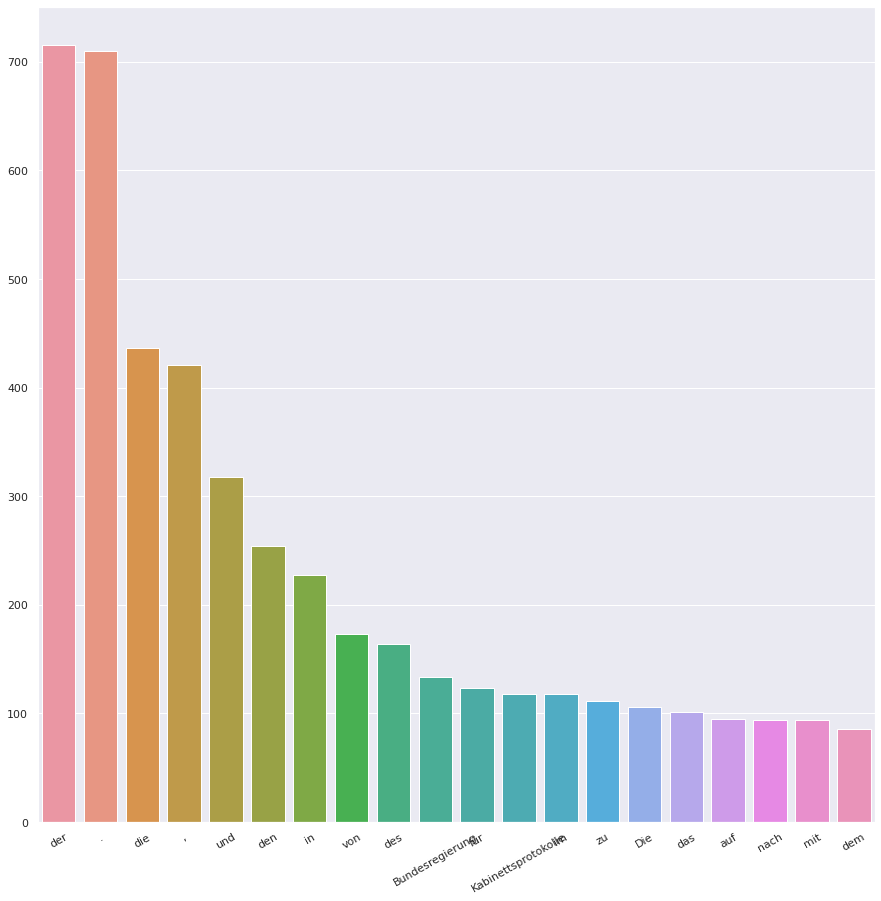

In [55]:
#Perform Frequency distribusion on words extracted
#Displaying top 20

from nltk import FreqDist
import seaborn as sns

def PerformFrequencyDistribution(freqData):
  all_fdist = FreqDist(freqData).most_common(20)

  ## Conversion to Pandas series via Python Dictionary for easier plotting
  all_fdist = pd.Series(dict(all_fdist))

  ## Setting figure, ax into variables
  fig, ax = plt.subplots(figsize=(15,15))

  ## Seaborn plotting using Pandas attributes + xtick rotation for ease of viewing
  all_plot = sns.barplot(x=all_fdist.index, y=all_fdist.values, ax=ax)
  plt.xticks(rotation=30);

PerformFrequencyDistribution(words)  

In [20]:
urlDetails.head()

,Url,TextInfo,sent_tokenize,word_tokenize
0,https://www.bundesarchiv.de/cocoon/barch/0000/...,Die Kabinettsprotokolle der Bundesregierung Ba...,[Die Kabinettsprotokolle der Bundesregierung B...,"[Die, Kabinettsprotokolle, der, Bundesregierun..."
1,https://www.bundesarchiv.de/cocoon/barch/1000/...,Kabinett\nAuf der Grundlage des 1979 von der B...,[Kabinett\nAuf der Grundlage des 1979 von der ...,"[Kabinett, Auf, der, Grundlage, des, 1979, von..."
2,https://www.bundesarchiv.de/cocoon/barch/0000/...,Die Kabinettsprotokolle der Bundesregierung 1988,[Die Kabinettsprotokolle der Bundesregierung 1...,"[Die, Kabinettsprotokolle, der, Bundesregierun..."
3,https://www.bundesarchiv.de/cocoon/barch/0000/...,Allgemeine HinweiseHier finden Sie Information...,[Allgemeine HinweiseHier finden Sie Informatio...,"[Allgemeine, HinweiseHier, finden, Sie, Inform..."
4,https://www.bundesarchiv.de/cocoon/barch/0000/...,Die Kabinettsprotokolle der Bundesregierung Ba...,[Die Kabinettsprotokolle der Bundesregierung B...,"[Die, Kabinettsprotokolle, der, Bundesregierun..."


Using Snowball stemmer
https://www.nltk.org/howto/stem.html


In [21]:
#Now actual stemming code
#Using Snowball stemmer
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("german")

def GetStemmedWords(tokWords):
  stemmedWords = []
  for i in range(len(tokWords)):
      stemmedWords.append( stemmer.stem(tokWords[i]) )
  return stemmedWords


In [22]:
#Testing 
urlDetails['word_tokenize'][0]
range(len(urlDetails['word_tokenize'][0]))

stemmer.stem(urlDetails['word_tokenize'][0][1])
GetStemmedWords(urlDetails['word_tokenize'][0])

tokWords= urlDetails['word_tokenize'][0]
stemmedWords = []
for i in range(len(tokWords)):
  stemmedWords.append( stemmer.stem(tokWords[i]) )#Since we are processing one word at a time use append instead of extend
stemmedWords

['die',
 'kabinettsprotokoll',
 'der',
 'bundesregier',
 'band',
 '27',
 '.',
 '1974',
 'herausgegeb',
 'fur',
 'das',
 'bundesarchiv',
 'von',
 'michael',
 'hollmannbearbeitet',
 'von',
 'uta',
 'rosselunt',
 'mitwirk',
 'von',
 'christin',
 'fabian',
 ',',
 'veronika',
 'heyde-gortz',
 'und',
 'christoph',
 'seemann',
 'de',
 'gruyt',
 'oldenbourg',
 'verlag',
 'berlin/boston',
 '2018isbn',
 '978-3-11-056762-5',
 'nur',
 'vier',
 'tag',
 'nach',
 'der',
 'fur',
 'die',
 'deutsch-deutsch',
 'bezieh',
 'bedeutsam',
 'eroffn',
 'der',
 'standig',
 'vertret',
 'der',
 'bundesrepubl',
 'und',
 'der',
 'ddr',
 'tritt',
 'bundeskanzl',
 'willy',
 'brandt',
 'zuruck',
 'und',
 'ubernimmt',
 'damit',
 'die',
 'polit',
 'verantwort',
 'fur',
 'die',
 'spionageaffar',
 'um',
 'sein',
 'person',
 'referent',
 'gunt',
 'guillaum',
 '.',
 'die',
 'neu',
 'bundesregier',
 'unt',
 'bundeskanzl',
 'helmut',
 'schmidt',
 'fuhrt',
 'die',
 'bisher',
 'ost-',
 'und',
 'deutschlandpolit',
 'fort',
 'und'

In [23]:
#Now create a new column with stemmed words of arry

urlDetails['stemmedWords'] = urlDetails['word_tokenize'].apply(GetStemmedWords) 

urlDetails.stemmedWords[0]

['die',
 'kabinettsprotokoll',
 'der',
 'bundesregier',
 'band',
 '27',
 '.',
 '1974',
 'herausgegeb',
 'fur',
 'das',
 'bundesarchiv',
 'von',
 'michael',
 'hollmannbearbeitet',
 'von',
 'uta',
 'rosselunt',
 'mitwirk',
 'von',
 'christin',
 'fabian',
 ',',
 'veronika',
 'heyde-gortz',
 'und',
 'christoph',
 'seemann',
 'de',
 'gruyt',
 'oldenbourg',
 'verlag',
 'berlin/boston',
 '2018isbn',
 '978-3-11-056762-5',
 'nur',
 'vier',
 'tag',
 'nach',
 'der',
 'fur',
 'die',
 'deutsch-deutsch',
 'bezieh',
 'bedeutsam',
 'eroffn',
 'der',
 'standig',
 'vertret',
 'der',
 'bundesrepubl',
 'und',
 'der',
 'ddr',
 'tritt',
 'bundeskanzl',
 'willy',
 'brandt',
 'zuruck',
 'und',
 'ubernimmt',
 'damit',
 'die',
 'polit',
 'verantwort',
 'fur',
 'die',
 'spionageaffar',
 'um',
 'sein',
 'person',
 'referent',
 'gunt',
 'guillaum',
 '.',
 'die',
 'neu',
 'bundesregier',
 'unt',
 'bundeskanzl',
 'helmut',
 'schmidt',
 'fuhrt',
 'die',
 'bisher',
 'ost-',
 'und',
 'deutschlandpolit',
 'fort',
 'und'

In [24]:
#Now add a new Column to check how meaningful it is after stemming
seperator = " "
def JoinArray(arr):
  return seperator.join(arr)

In [25]:

urlDetails['stemmedScentence'] = urlDetails['stemmedWords'].apply(JoinArray) 

urlDetails.stemmedScentence[0]

'die kabinettsprotokoll der bundesregier band 27 . 1974 herausgegeb fur das bundesarchiv von michael hollmannbearbeitet von uta rosselunt mitwirk von christin fabian , veronika heyde-gortz und christoph seemann de gruyt oldenbourg verlag berlin/boston 2018isbn 978-3-11-056762-5 nur vier tag nach der fur die deutsch-deutsch bezieh bedeutsam eroffn der standig vertret der bundesrepubl und der ddr tritt bundeskanzl willy brandt zuruck und ubernimmt damit die polit verantwort fur die spionageaffar um sein person referent gunt guillaum . die neu bundesregier unt bundeskanzl helmut schmidt fuhrt die bisher ost- und deutschlandpolit fort und bemuht sich gleichermass um ein intensivier der transatlant bezieh . die mit der olkris 1973/74 einhergeh wirtschaft rezession erschwert die umsetz der innenpolit reformvorhab . angesicht der begrenzt energieressourc gewinn plan zur kernkraftnutz zusatz auftrieb . zur abstimm gemeinsam polit ziel beschliess die staats- und regierungschef der europa gemein

Google translation for the above Stemmed Text

The Cabinet Minutes of the Federal Government Volume 27. 1974 published for the federal archive by michael hollmann edited by uta rosselunt with the help of christin fabian, veronika heyde-gortz and christoph seemann de gruyt oldenbourg verlag berlin/boston 2018isbn 978-3-11-056762-5 only four days after the for the german-german The permanent representative of the Federal Republic and the GDR resigns and thus assumes political responsibility for the espionage affair surrounding his personal speaker Gunt Guillaum. the new federal government and chancellor helmut schmidt is continuing the policy towards east and germany and is trying to intensify the transatlantic relationship. the economic recession that accompanied the olkris of 1973/74 made it difficult to implement the domestic reform project. given the limited energy resource gain plan to use nuclear power additional boost . to agree on a common political goal, the heads of state and government of the european community decide to meet regularly with the foreign minister as the council of the community (from 1992 council of europe) at the summit conference in paris. the cabinet also advises organizers on questions and safety measures for the soccer world championships in munch, where the german team wins the title for the second time.

In [26]:
urlDetails.TextInfo[0] #Original text

'Die Kabinettsprotokolle der Bundesregierung Band 27. 1974\nherausgegeben für das Bundesarchiv von Michael Hollmannbearbeitet von Uta Rösselunter Mitwirkung von Christine Fabian, Veronika Heyde-Görtz und Christoph Seemann\nDe Gruyter Oldenbourg Verlag Berlin/Boston 2018ISBN 978-3-11-056762-5\nNur vier Tage nach der für die deutsch-deutschen Beziehungen bedeutsamen Eröffnung der Ständigen Vertretungen der Bundesrepublik und der DDR tritt Bundeskanzler Willy Brandt zurück und übernimmt damit die politische Verantwortung für die Spionageaffäre um seinen persönlichen Referenten Günter Guillaume. Die neue Bundesregierung unter Bundeskanzler Helmut Schmidt führt die bisherige Ost- und Deutschlandpolitik fort und bemüht sich gleichermaßen um eine Intensivierung der transatlantischen Beziehungen. Die mit der Ölkrise 1973/74 einhergehende wirtschaftliche Rezession erschwert die Umsetzung der innenpolitischen Reformvorhaben. Angesichts der begrenzten Energieressourcen gewinnen Pläne zur Kernkraf

Google translation for the above original german text

The Cabinet Minutes of the Federal Government Volume 27. 1974
published for the Federal Archives by Michael Hollmann edited by Uta Rössel with the participation of Christine Fabian, Veronika Heyde-Görtz and Christoph Seemann
De Gruyter Oldenbourg Verlag Berlin/Boston 2018ISBN 978-3-11-056762-5
Only four days after the opening of the permanent representations of the Federal Republic and the GDR, which was important for German-German relations, Chancellor Willy Brandt resigns and thus assumes political responsibility for the espionage affair involving his personal adviser Günter Guillaume. The new federal government under Chancellor Helmut Schmidt is continuing the policy towards the East and Germany and is also trying to intensify transatlantic relations. The economic recession that accompanied the oil crisis of 1973/74 made it more difficult to implement the domestic political reform plans. With limited energy resources, nuclear power plans are gaining additional impetus. In order to coordinate common political goals, the heads of state and government of the European Communities decide to meet regularly with the foreign ministers as the Council of the Community (from 1992 European Council) at the summit conference in Paris. The cabinet also advises on organizational issues and security measures for the soccer World Cup in Munich, in which the German team wins the title for the second time.


**Lematization - Makes meaningful processing** <br/>
Choosing this over stemming
However it takes more time

https://www.nltk.org/_modules/nltk/stem/wordnet.html

In [27]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

def GetLemmatizedWords(tokWords):
  lemmWords = []
  for i in range(len(tokWords)):
      lemmWords.append( lemmatizer.lemmatize(tokWords[i]) )
  return stemmedWords

In [28]:
#Testing
GetLemmatizedWords(urlDetails['word_tokenize'][0])


['die',
 'kabinettsprotokoll',
 'der',
 'bundesregier',
 'band',
 '27',
 '.',
 '1974',
 'herausgegeb',
 'fur',
 'das',
 'bundesarchiv',
 'von',
 'michael',
 'hollmannbearbeitet',
 'von',
 'uta',
 'rosselunt',
 'mitwirk',
 'von',
 'christin',
 'fabian',
 ',',
 'veronika',
 'heyde-gortz',
 'und',
 'christoph',
 'seemann',
 'de',
 'gruyt',
 'oldenbourg',
 'verlag',
 'berlin/boston',
 '2018isbn',
 '978-3-11-056762-5',
 'nur',
 'vier',
 'tag',
 'nach',
 'der',
 'fur',
 'die',
 'deutsch-deutsch',
 'bezieh',
 'bedeutsam',
 'eroffn',
 'der',
 'standig',
 'vertret',
 'der',
 'bundesrepubl',
 'und',
 'der',
 'ddr',
 'tritt',
 'bundeskanzl',
 'willy',
 'brandt',
 'zuruck',
 'und',
 'ubernimmt',
 'damit',
 'die',
 'polit',
 'verantwort',
 'fur',
 'die',
 'spionageaffar',
 'um',
 'sein',
 'person',
 'referent',
 'gunt',
 'guillaum',
 '.',
 'die',
 'neu',
 'bundesregier',
 'unt',
 'bundeskanzl',
 'helmut',
 'schmidt',
 'fuhrt',
 'die',
 'bisher',
 'ost-',
 'und',
 'deutschlandpolit',
 'fort',
 'und'

In [29]:
#Now create a new column with stemmed words of arry

urlDetails['lemmaWords'] = urlDetails['word_tokenize'].apply(GetLemmatizedWords) 

urlDetails.lemmaWords[0]

['die',
 'kabinettsprotokoll',
 'der',
 'bundesregier',
 'band',
 '27',
 '.',
 '1974',
 'herausgegeb',
 'fur',
 'das',
 'bundesarchiv',
 'von',
 'michael',
 'hollmannbearbeitet',
 'von',
 'uta',
 'rosselunt',
 'mitwirk',
 'von',
 'christin',
 'fabian',
 ',',
 'veronika',
 'heyde-gortz',
 'und',
 'christoph',
 'seemann',
 'de',
 'gruyt',
 'oldenbourg',
 'verlag',
 'berlin/boston',
 '2018isbn',
 '978-3-11-056762-5',
 'nur',
 'vier',
 'tag',
 'nach',
 'der',
 'fur',
 'die',
 'deutsch-deutsch',
 'bezieh',
 'bedeutsam',
 'eroffn',
 'der',
 'standig',
 'vertret',
 'der',
 'bundesrepubl',
 'und',
 'der',
 'ddr',
 'tritt',
 'bundeskanzl',
 'willy',
 'brandt',
 'zuruck',
 'und',
 'ubernimmt',
 'damit',
 'die',
 'polit',
 'verantwort',
 'fur',
 'die',
 'spionageaffar',
 'um',
 'sein',
 'person',
 'referent',
 'gunt',
 'guillaum',
 '.',
 'die',
 'neu',
 'bundesregier',
 'unt',
 'bundeskanzl',
 'helmut',
 'schmidt',
 'fuhrt',
 'die',
 'bisher',
 'ost-',
 'und',
 'deutschlandpolit',
 'fort',
 'und'

In [30]:
#Now lets check the lemmatized scentences 
urlDetails['lemmaScentence'] = urlDetails['lemmaWords'].apply(JoinArray) 

urlDetails.lemmaScentence[0]

'die kabinettsprotokoll der bundesregier band 27 . 1974 herausgegeb fur das bundesarchiv von michael hollmannbearbeitet von uta rosselunt mitwirk von christin fabian , veronika heyde-gortz und christoph seemann de gruyt oldenbourg verlag berlin/boston 2018isbn 978-3-11-056762-5 nur vier tag nach der fur die deutsch-deutsch bezieh bedeutsam eroffn der standig vertret der bundesrepubl und der ddr tritt bundeskanzl willy brandt zuruck und ubernimmt damit die polit verantwort fur die spionageaffar um sein person referent gunt guillaum . die neu bundesregier unt bundeskanzl helmut schmidt fuhrt die bisher ost- und deutschlandpolit fort und bemuht sich gleichermass um ein intensivier der transatlant bezieh . die mit der olkris 1973/74 einhergeh wirtschaft rezession erschwert die umsetz der innenpolit reformvorhab . angesicht der begrenzt energieressourc gewinn plan zur kernkraftnutz zusatz auftrieb . zur abstimm gemeinsam polit ziel beschliess die staats- und regierungschef der europa gemein

In [31]:
urlDetails.head()

,Url,TextInfo,sent_tokenize,word_tokenize,stemmedWords,stemmedScentence,lemmaWords,lemmaScentence
0,https://www.bundesarchiv.de/cocoon/barch/0000/...,Die Kabinettsprotokolle der Bundesregierung Ba...,[Die Kabinettsprotokolle der Bundesregierung B...,"[Die, Kabinettsprotokolle, der, Bundesregierun...","[die, kabinettsprotokoll, der, bundesregier, b...",die kabinettsprotokoll der bundesregier band 2...,"[die, kabinettsprotokoll, der, bundesregier, b...",die kabinettsprotokoll der bundesregier band 2...
1,https://www.bundesarchiv.de/cocoon/barch/1000/...,Kabinett\nAuf der Grundlage des 1979 von der B...,[Kabinett\nAuf der Grundlage des 1979 von der ...,"[Kabinett, Auf, der, Grundlage, des, 1979, von...","[kabinett, auf, der, grundlag, des, 1979, von,...",kabinett auf der grundlag des 1979 von der bun...,"[die, kabinettsprotokoll, der, bundesregier, b...",die kabinettsprotokoll der bundesregier band 2...
2,https://www.bundesarchiv.de/cocoon/barch/0000/...,Die Kabinettsprotokolle der Bundesregierung 1988,[Die Kabinettsprotokolle der Bundesregierung 1...,"[Die, Kabinettsprotokolle, der, Bundesregierun...","[die, kabinettsprotokoll, der, bundesregier, 1...",die kabinettsprotokoll der bundesregier 1988,"[die, kabinettsprotokoll, der, bundesregier, b...",die kabinettsprotokoll der bundesregier band 2...
3,https://www.bundesarchiv.de/cocoon/barch/0000/...,Allgemeine HinweiseHier finden Sie Information...,[Allgemeine HinweiseHier finden Sie Informatio...,"[Allgemeine, HinweiseHier, finden, Sie, Inform...","[allgemein, hinweisehi, find, sie, information...",allgemein hinweisehi find sie information und ...,"[die, kabinettsprotokoll, der, bundesregier, b...",die kabinettsprotokoll der bundesregier band 2...
4,https://www.bundesarchiv.de/cocoon/barch/0000/...,Die Kabinettsprotokolle der Bundesregierung Ba...,[Die Kabinettsprotokolle der Bundesregierung B...,"[Die, Kabinettsprotokolle, der, Bundesregierun...","[die, kabinettsprotokoll, der, bundesregier, b...",die kabinettsprotokoll der bundesregier band 1...,"[die, kabinettsprotokoll, der, bundesregier, b...",die kabinettsprotokoll der bundesregier band 2...


In the above example we tried stemming and lemmatization, where found lemmatization provides a meaningful details and fits our requirement.

------------------------


In [32]:
# Import nltk
import nltk

nltk.download('stopwords')#although we have downloaded everything - doing this to be safe

# Get English stopwords and print some of them
sw = nltk.corpus.stopwords.words('german')
sw[:15]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['aber',
 'alle',
 'allem',
 'allen',
 'aller',
 'alles',
 'als',
 'also',
 'am',
 'an',
 'ander',
 'andere',
 'anderem',
 'anderen',
 'anderer']

In [41]:
wordWithoutStopWord = [] #For Frequency Distribution chart- collect all words
def GetScentenceWithoutStopWords(tokWords):
  actualWords = [] #without stopwords
  for i in range(len(tokWords)):
    if tokWords[i] not in sw:
        actualWords.append( tokWords[i] )
        wordWithoutStopWord.append(tokWords[i])
  return JoinArray(actualWords) #return only the scentence

In [38]:
#Testing
# b = urlDetails['word_tokenize'][0]
# print(str(len(b)))
# for i in range(len(b)):
#   if b[i] not in sw:
#     print(b[i])
GetScentenceWithoutStopWords(urlDetails['word_tokenize'][0])


'Die Kabinettsprotokolle Bundesregierung Band 27 . 1974 herausgegeben Bundesarchiv Michael Hollmannbearbeitet Uta Rösselunter Mitwirkung Christine Fabian , Veronika Heyde-Görtz Christoph Seemann De Gruyter Oldenbourg Verlag Berlin/Boston 2018ISBN 978-3-11-056762-5 Nur vier Tage deutsch-deutschen Beziehungen bedeutsamen Eröffnung Ständigen Vertretungen Bundesrepublik DDR tritt Bundeskanzler Willy Brandt zurück übernimmt politische Verantwortung Spionageaffäre persönlichen Referenten Günter Guillaume . Die neue Bundesregierung Bundeskanzler Helmut Schmidt führt bisherige Ost- Deutschlandpolitik fort bemüht gleichermaßen Intensivierung transatlantischen Beziehungen . Die Ölkrise 1973/74 einhergehende wirtschaftliche Rezession erschwert Umsetzung innenpolitischen Reformvorhaben . Angesichts begrenzten Energieressourcen gewinnen Pläne Kernkraftnutzung zusätzlichen Auftrieb . Zur Abstimmung gemeinsamer politischer Ziele beschließen Staats- Regierungschefs Europäischen Gemeinschaften Gipfelko

In [42]:
#Now create a new column with stop words removed

urlDetails['withoutStopWords'] = urlDetails['word_tokenize'].apply(GetScentenceWithoutStopWords) 

urlDetails.withoutStopWords[0]

'Die Kabinettsprotokolle Bundesregierung Band 27 . 1974 herausgegeben Bundesarchiv Michael Hollmannbearbeitet Uta Rösselunter Mitwirkung Christine Fabian , Veronika Heyde-Görtz Christoph Seemann De Gruyter Oldenbourg Verlag Berlin/Boston 2018ISBN 978-3-11-056762-5 Nur vier Tage deutsch-deutschen Beziehungen bedeutsamen Eröffnung Ständigen Vertretungen Bundesrepublik DDR tritt Bundeskanzler Willy Brandt zurück übernimmt politische Verantwortung Spionageaffäre persönlichen Referenten Günter Guillaume . Die neue Bundesregierung Bundeskanzler Helmut Schmidt führt bisherige Ost- Deutschlandpolitik fort bemüht gleichermaßen Intensivierung transatlantischen Beziehungen . Die Ölkrise 1973/74 einhergehende wirtschaftliche Rezession erschwert Umsetzung innenpolitischen Reformvorhaben . Angesichts begrenzten Energieressourcen gewinnen Pläne Kernkraftnutzung zusätzlichen Auftrieb . Zur Abstimmung gemeinsamer politischer Ziele beschließen Staats- Regierungschefs Europäischen Gemeinschaften Gipfelko

In [43]:
urlDetails.head()

,Url,TextInfo,sent_tokenize,word_tokenize,stemmedWords,stemmedScentence,lemmaWords,lemmaScentence,withoutStopWords
0,https://www.bundesarchiv.de/cocoon/barch/0000/...,Die Kabinettsprotokolle der Bundesregierung Ba...,[Die Kabinettsprotokolle der Bundesregierung B...,"[Die, Kabinettsprotokolle, der, Bundesregierun...","[die, kabinettsprotokoll, der, bundesregier, b...",die kabinettsprotokoll der bundesregier band 2...,"[die, kabinettsprotokoll, der, bundesregier, b...",die kabinettsprotokoll der bundesregier band 2...,Die Kabinettsprotokolle Bundesregierung Band 2...
1,https://www.bundesarchiv.de/cocoon/barch/1000/...,Kabinett\nAuf der Grundlage des 1979 von der B...,[Kabinett\nAuf der Grundlage des 1979 von der ...,"[Kabinett, Auf, der, Grundlage, des, 1979, von...","[kabinett, auf, der, grundlag, des, 1979, von,...",kabinett auf der grundlag des 1979 von der bun...,"[die, kabinettsprotokoll, der, bundesregier, b...",die kabinettsprotokoll der bundesregier band 2...,Kabinett Auf Grundlage 1979 Bundesregierung Bu...
2,https://www.bundesarchiv.de/cocoon/barch/0000/...,Die Kabinettsprotokolle der Bundesregierung 1988,[Die Kabinettsprotokolle der Bundesregierung 1...,"[Die, Kabinettsprotokolle, der, Bundesregierun...","[die, kabinettsprotokoll, der, bundesregier, 1...",die kabinettsprotokoll der bundesregier 1988,"[die, kabinettsprotokoll, der, bundesregier, b...",die kabinettsprotokoll der bundesregier band 2...,Die Kabinettsprotokolle Bundesregierung 1988
3,https://www.bundesarchiv.de/cocoon/barch/0000/...,Allgemeine HinweiseHier finden Sie Information...,[Allgemeine HinweiseHier finden Sie Informatio...,"[Allgemeine, HinweiseHier, finden, Sie, Inform...","[allgemein, hinweisehi, find, sie, information...",allgemein hinweisehi find sie information und ...,"[die, kabinettsprotokoll, der, bundesregier, b...",die kabinettsprotokoll der bundesregier band 2...,Allgemeine HinweiseHier finden Sie Information...
4,https://www.bundesarchiv.de/cocoon/barch/0000/...,Die Kabinettsprotokolle der Bundesregierung Ba...,[Die Kabinettsprotokolle der Bundesregierung B...,"[Die, Kabinettsprotokolle, der, Bundesregierun...","[die, kabinettsprotokoll, der, bundesregier, b...",die kabinettsprotokoll der bundesregier band 1...,"[die, kabinettsprotokoll, der, bundesregier, b...",die kabinettsprotokoll der bundesregier band 2...,Die Kabinettsprotokolle Bundesregierung Band 1...


In [44]:
len(wordWithoutStopWord)

9599

In [ ]:
# #Tokenize the Words
# from nltk.tokenize import RegexpTokenizer

# # Create tokenizer
# tokenizer = RegexpTokenizer('\w+')

# tokens = tokenizer.tokenize(pagetext)
# tokens[:8]

**Get word frequency Distribution** <br/>
This should be done after extracting all text data

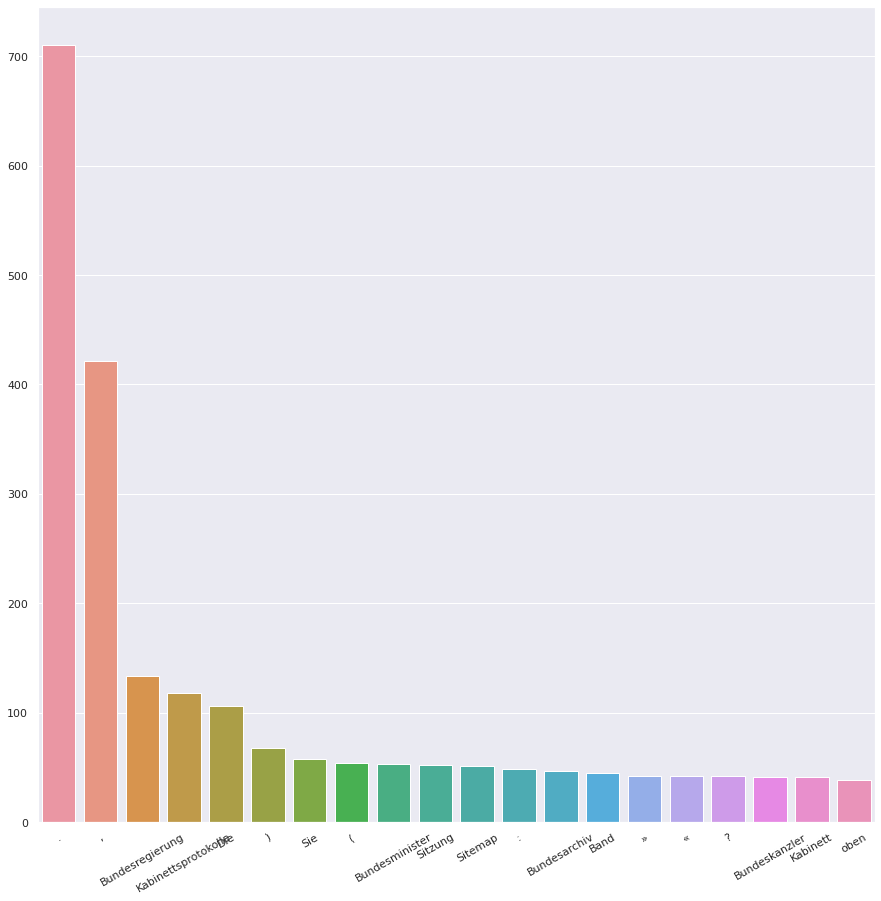

In [56]:
#Get Word Frequency Distribution -For with stop words removed
#Displaying top 20

PerformFrequencyDistribution(wordWithoutStopWord)

In [ ]:
#Chunking of Data

ne_chunks = nltk.batch_ne_chunk(words_ns)

Install Additional stop words - stop-words - If Required. Curren

https://pypi.org/project/stop-words/


In [ ]:
#Create a stemmer ignoring stop words
stemmer2 = SnowballStemmer("german", ignore_stopwords=True)
